<a href="https://colab.research.google.com/github/PaulNjinu254/Binary-Classification-of-Irises/blob/main/Binary_Classification_of_Iries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-3266685544>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_binary, x='species', y=features[0], palette='Set2')
<ipython-input-1-3266685544>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_binary, x='species', y=features[1], palette='Set2')
<ipython-input-1-3266685544>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_binary, x='species', y=features[0], palette='Set2')
<ipython-input-1-3266685544>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

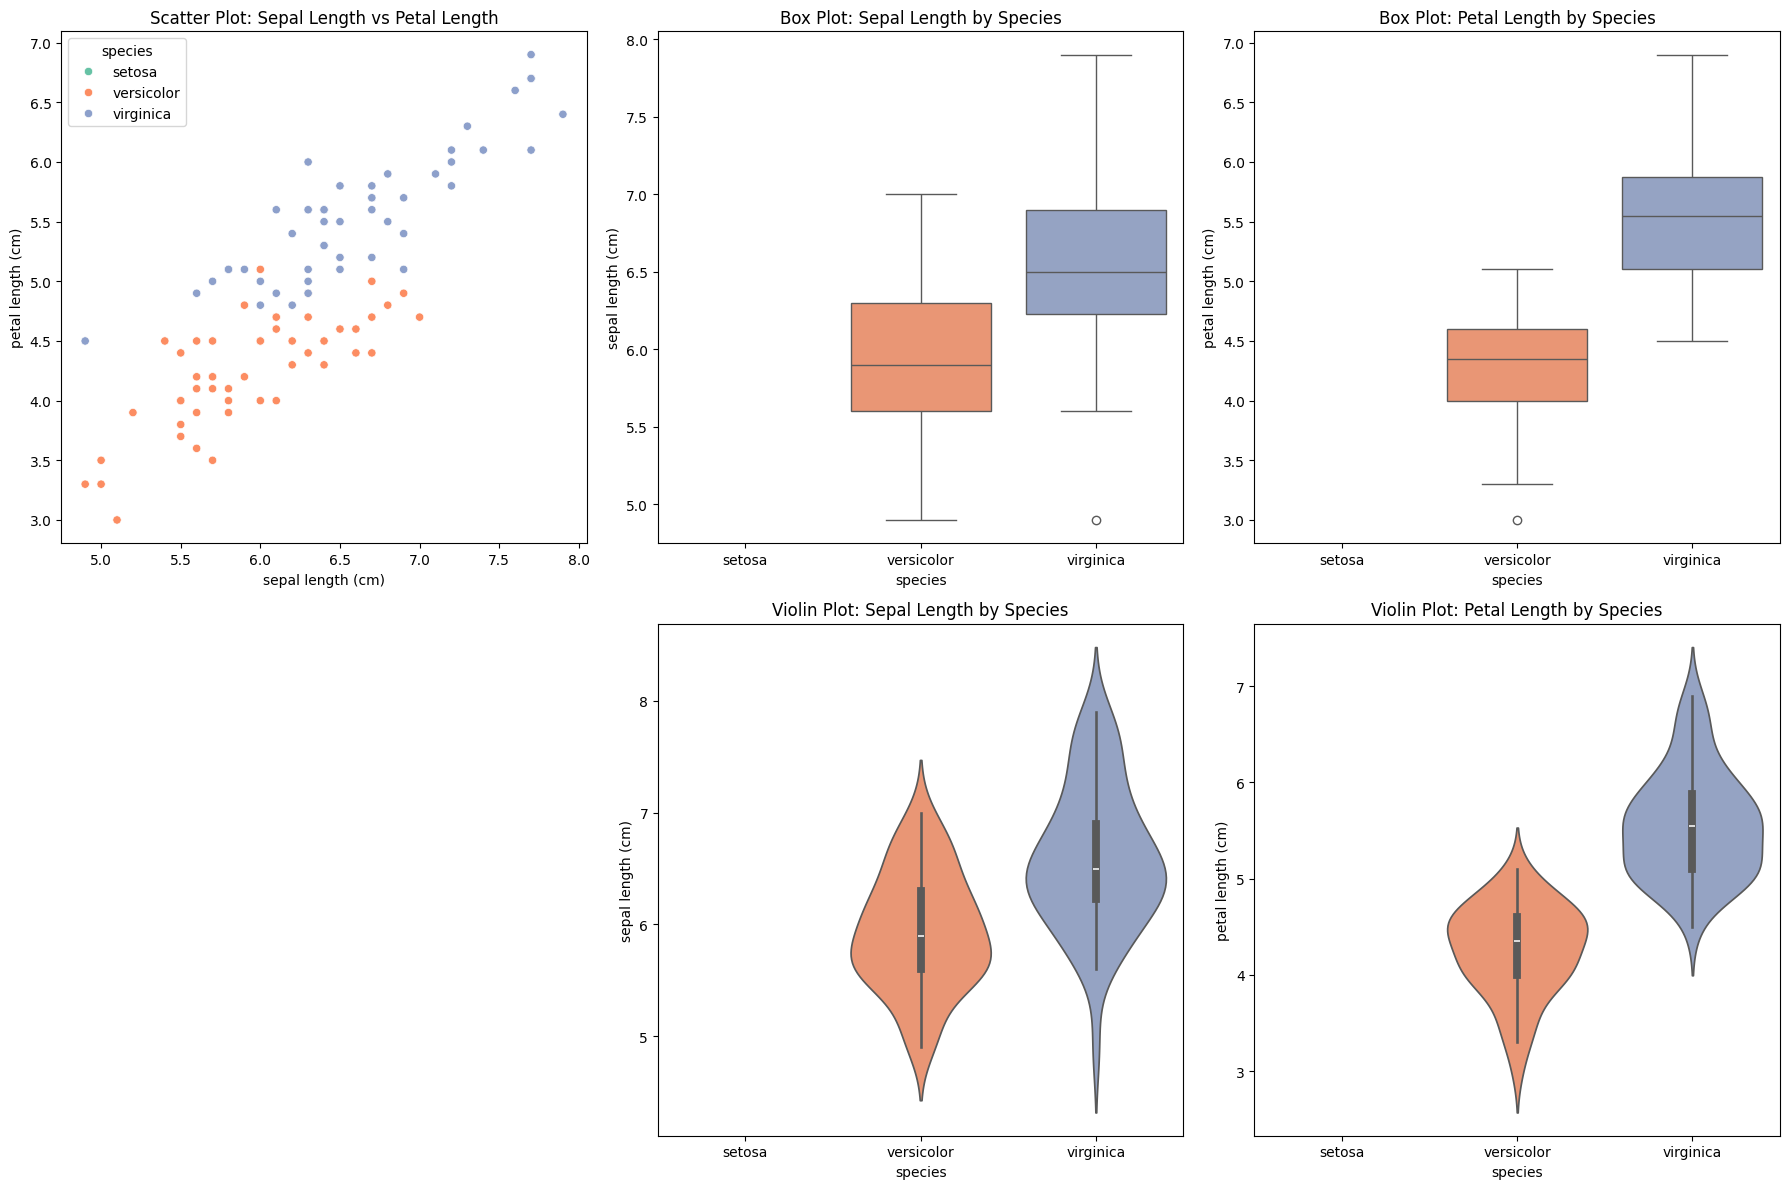

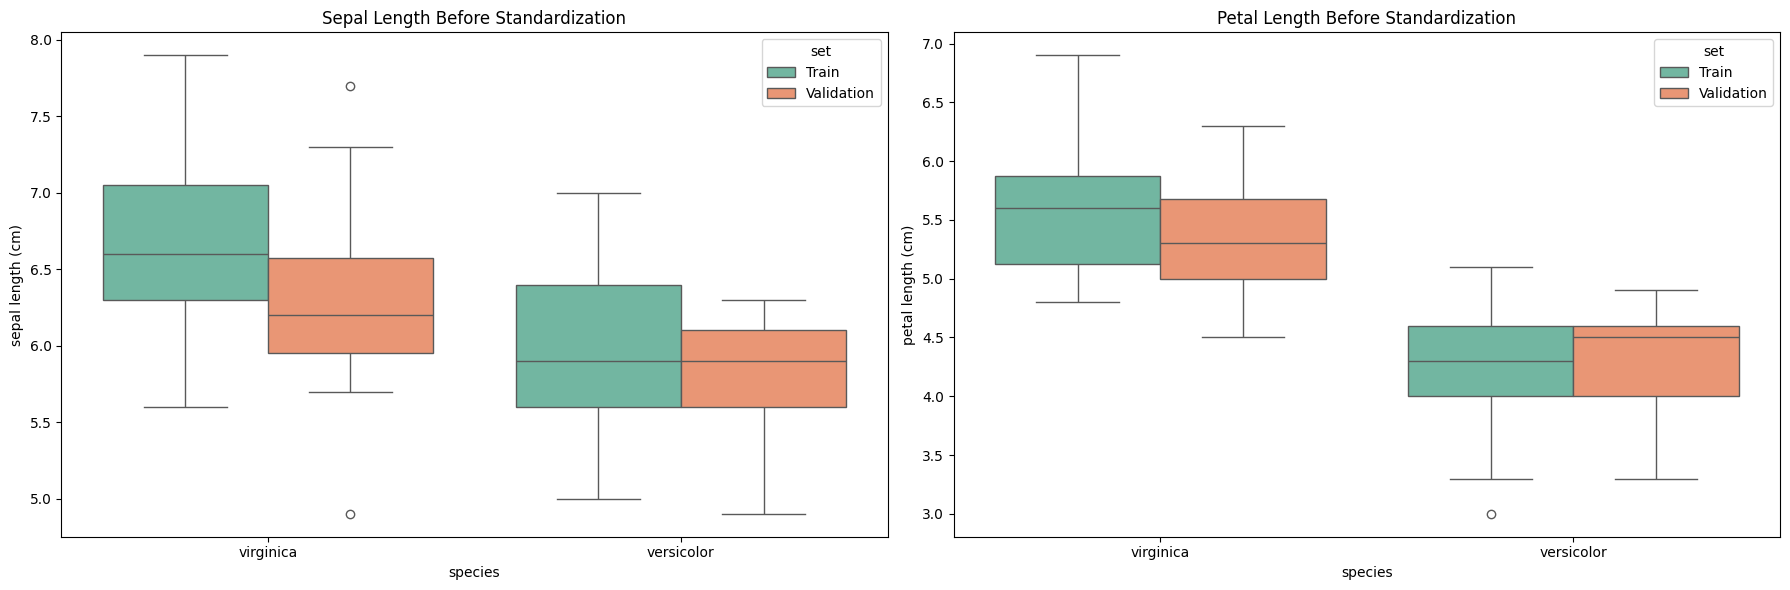

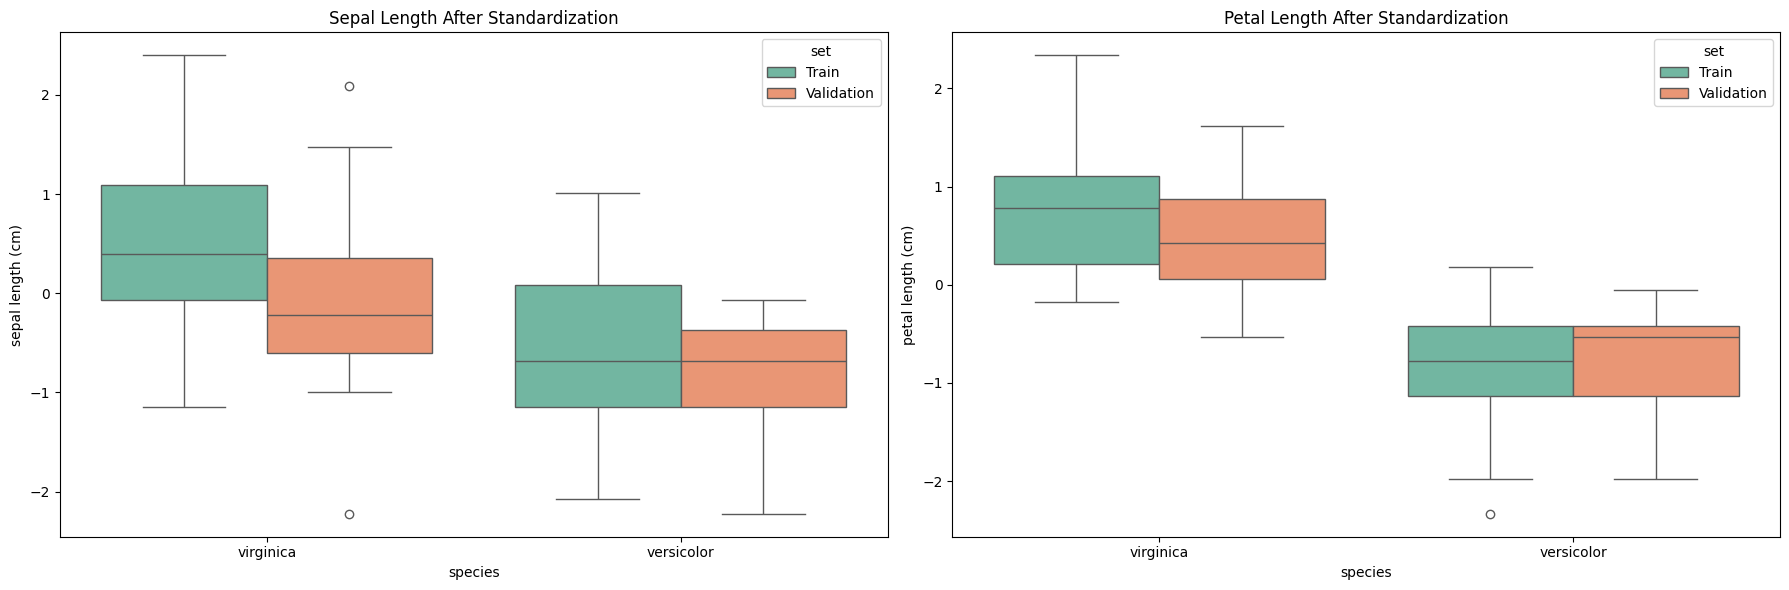

=== Performance Without Standardization ===
              precision    recall  f1-score   support

  versicolor       0.91      0.77      0.83        13
   virginica       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25


=== Performance With Standardization ===
              precision    recall  f1-score   support

  versicolor       0.90      0.69      0.78        13
   virginica       0.73      0.92      0.81        12

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25



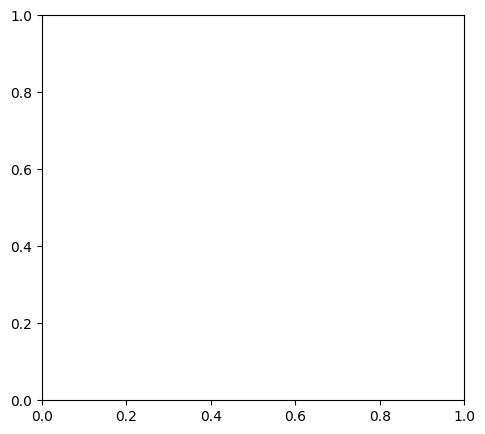

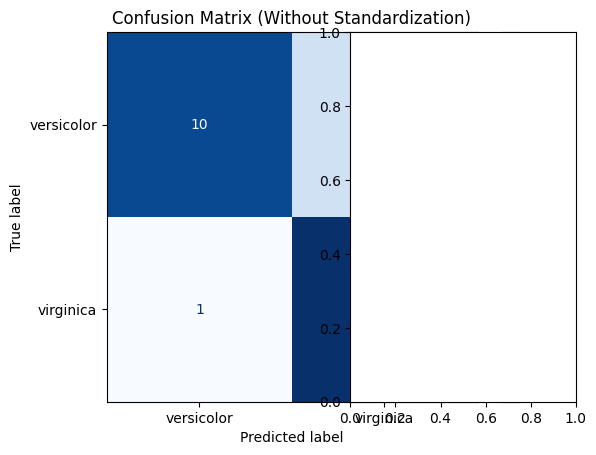

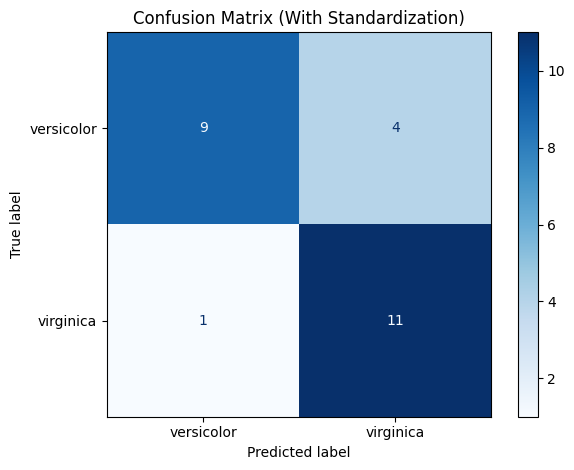

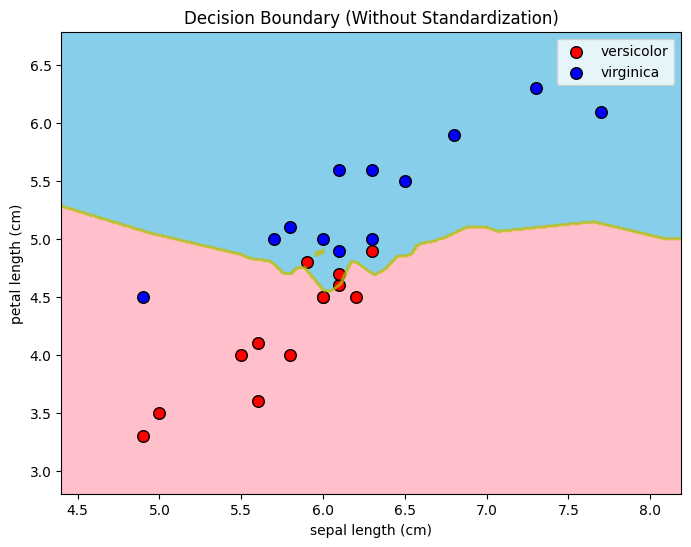

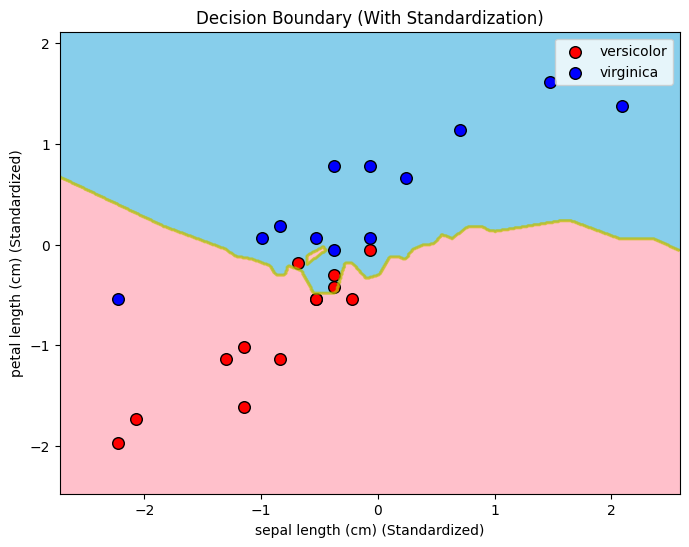

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Step 1: Load and Prepare Data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Use only versicolor and virginica
df_binary = df[df['species'].isin(['versicolor', 'virginica'])]
features = ['sepal length (cm)', 'petal length (cm)']
X = df_binary[features].values
y = df_binary['species'].apply(lambda x: 1 if x == 'virginica' else 0).values

# Step 2: Enhanced Visualization
# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Scatter Plot
plt.subplot(2, 3, 1)
sns.scatterplot(data=df_binary, x=features[0], y=features[1], hue='species', palette='Set2')
plt.title("Scatter Plot: Sepal Length vs Petal Length")

# Box Plots for each feature by species
plt.subplot(2, 3, 2)
sns.boxplot(data=df_binary, x='species', y=features[0], palette='Set2')
plt.title("Box Plot: Sepal Length by Species")

plt.subplot(2, 3, 3)
sns.boxplot(data=df_binary, x='species', y=features[1], palette='Set2')
plt.title("Box Plot: Petal Length by Species")

# Violin Plots for each feature by species
plt.subplot(2, 3, 5)
sns.violinplot(data=df_binary, x='species', y=features[0], palette='Set2')
plt.title("Violin Plot: Sepal Length by Species")

plt.subplot(2, 3, 6)
sns.violinplot(data=df_binary, x='species', y=features[1], palette='Set2')
plt.title("Violin Plot: Petal Length by Species")

plt.tight_layout()
plt.show()

# Step 3: Train/Test Split and Standardization Comparison
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Create DataFrames for visualization
train_df = pd.DataFrame(X_train, columns=features)
train_df['species'] = ['versicolor' if x == 0 else 'virginica' for x in y_train]
train_df['set'] = 'Train'

val_df = pd.DataFrame(X_val, columns=features)
val_df['species'] = ['versicolor' if x == 0 else 'virginica' for x in y_val]
val_df['set'] = 'Validation'

combined_df = pd.concat([train_df, val_df])

# Before Standardization Plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x='species', y=features[0], hue='set', palette='Set2')
plt.title("Sepal Length Before Standardization")

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x='species', y=features[1], hue='set', palette='Set2')
plt.title("Petal Length Before Standardization")

plt.tight_layout()
plt.show()

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Create DataFrames for standardized data visualization
train_std_df = pd.DataFrame(X_train_std, columns=features)
train_std_df['species'] = ['versicolor' if x == 0 else 'virginica' for x in y_train]
train_std_df['set'] = 'Train'

val_std_df = pd.DataFrame(X_val_std, columns=features)
val_std_df['species'] = ['versicolor' if x == 0 else 'virginica' for x in y_val]
val_std_df['set'] = 'Validation'

combined_std_df = pd.concat([train_std_df, val_std_df])

# After Standardization Plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_std_df, x='species', y=features[0], hue='set', palette='Set2')
plt.title("Sepal Length After Standardization")

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_std_df, x='species', y=features[1], hue='set', palette='Set2')
plt.title("Petal Length After Standardization")

plt.tight_layout()
plt.show()

# Step 4: Train Classifiers and Compare Performance
# Model without standardization
model_raw = KNeighborsClassifier(n_neighbors=3)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_val)

# Model with standardization
model_std = KNeighborsClassifier(n_neighbors=3)
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_val_std)

# Step 5: Evaluate and Compare Models
print("=== Performance Without Standardization ===")
print(classification_report(y_val, y_pred_raw, target_names=['versicolor', 'virginica']))

print("\n=== Performance With Standardization ===")
print(classification_report(y_val, y_pred_std, target_names=['versicolor', 'virginica']))

# Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_raw = confusion_matrix(y_val, y_pred_raw)
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=['versicolor', 'virginica'])
disp_raw.plot(cmap='Blues')
plt.title('Confusion Matrix (Without Standardization)')

plt.subplot(1, 2, 2)
cm_std = confusion_matrix(y_val, y_pred_std)
disp_std = ConfusionMatrixDisplay(confusion_matrix=cm_std, display_labels=['versicolor', 'virginica'])
disp_std.plot(cmap='Blues')
plt.title('Confusion Matrix (With Standardization)')

plt.tight_layout()
plt.show()

# Step 6: Visualize Decision Regions for Both Cases
def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['versicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=2, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=70, color=scatter_color[i], label=target_names[i], edgecolor='k')
    plt.legend()
    plt.show()

# Decision regions without standardization
decision_region(X_val, y_val, model_raw,
                title='Decision Boundary (Without Standardization)',
                xlabel=features[0],
                ylabel=features[1],
                target_names=['versicolor', 'virginica'])

# Decision regions with standardization
decision_region(X_val_std, y_val, model_std,
                title='Decision Boundary (With Standardization)',
                xlabel=features[0] + ' (Standardized)',
                ylabel=features[1] + ' (Standardized)',
                target_names=['versicolor', 'virginica'])